In [395]:
import librosa
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks
import pandas as pd
import IPython.display as ipd

In [396]:
from scipy.io import wavfile
from scipy import signal

# Load audio file
audio_file = './sample-audio.wav'
rate, audio = wavfile.read(audio_file)

# Extract frequency using STFT
frequencies, times, stft = signal.stft(audio, rate)

# Print frequency range
print('Frequency range: ', frequencies[0], 'Hz - ', frequencies[-1], 'Hz')


Frequency range:  0.0 Hz -  24000.0 Hz


c:\Users\mqoma\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\signal\_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 2, using nperseg = 2
  warnings.warn('nperseg = {0:d} is greater than input length '


In [397]:
audio_file = './sample-audio.wav'
signal, sr = librosa.load(audio_file, sr=None)

In [398]:
ipd.Audio(audio_file)

In [399]:
def plotWave(signal, time, title):

    plt.figure(figsize=(14, 5))
    plt.plot(time, signal)
    plt.title(title)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.show()

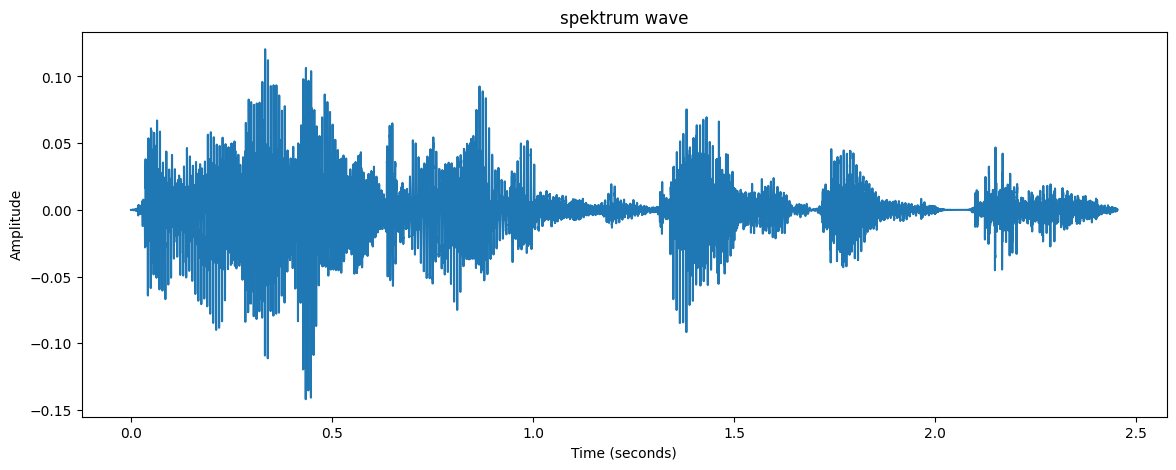

In [400]:
time = np.arange(0, len(signal)) / sr
plotWave(signal, time, "spektrum wave")

In [401]:
chunk_size = int(0.2 * sr)
num_chunks = len(signal) // chunk_size
chunks = np.array_split(signal[:num_chunks*chunk_size], num_chunks)


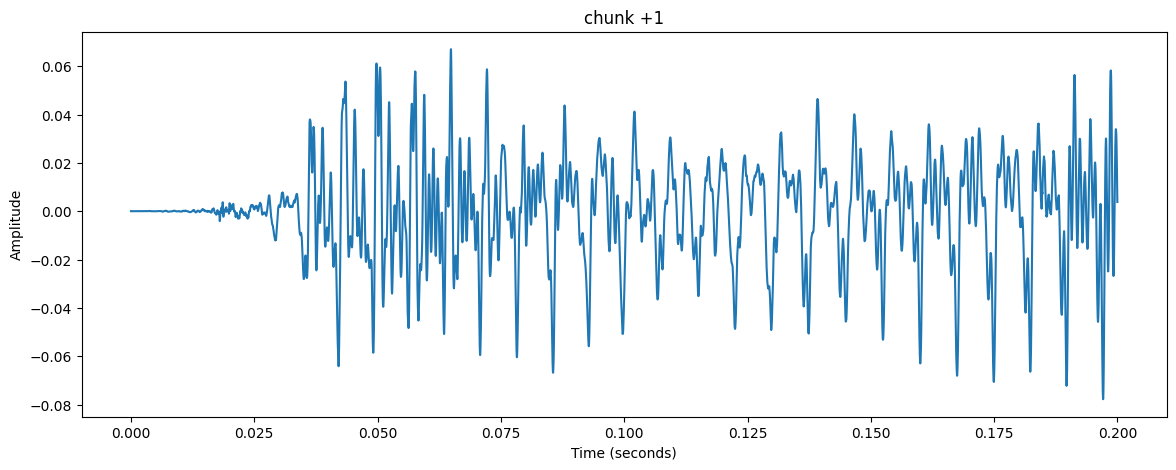

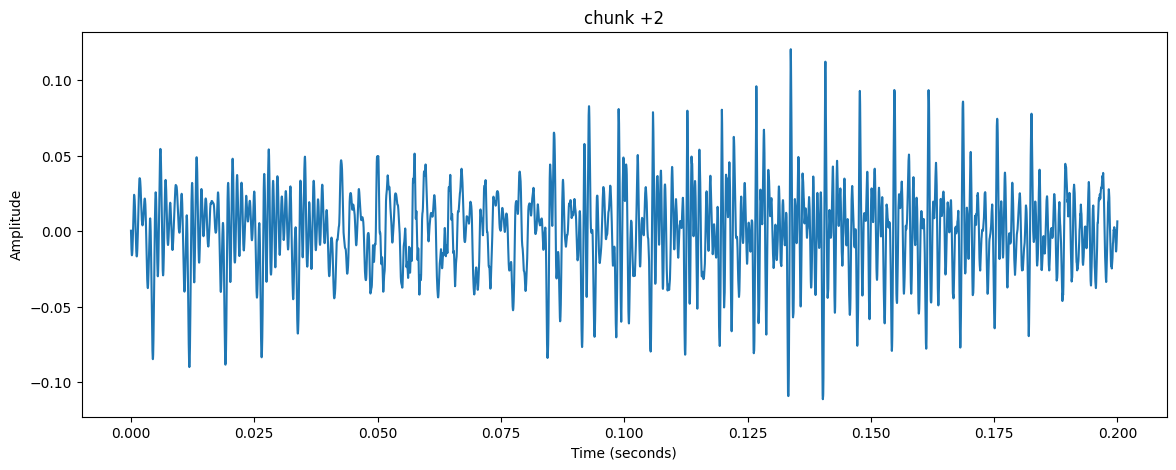

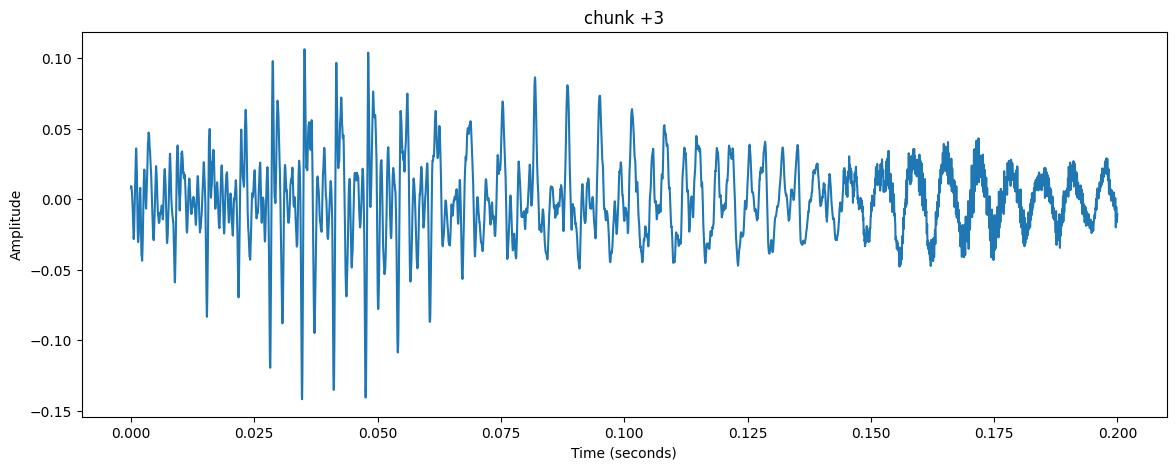

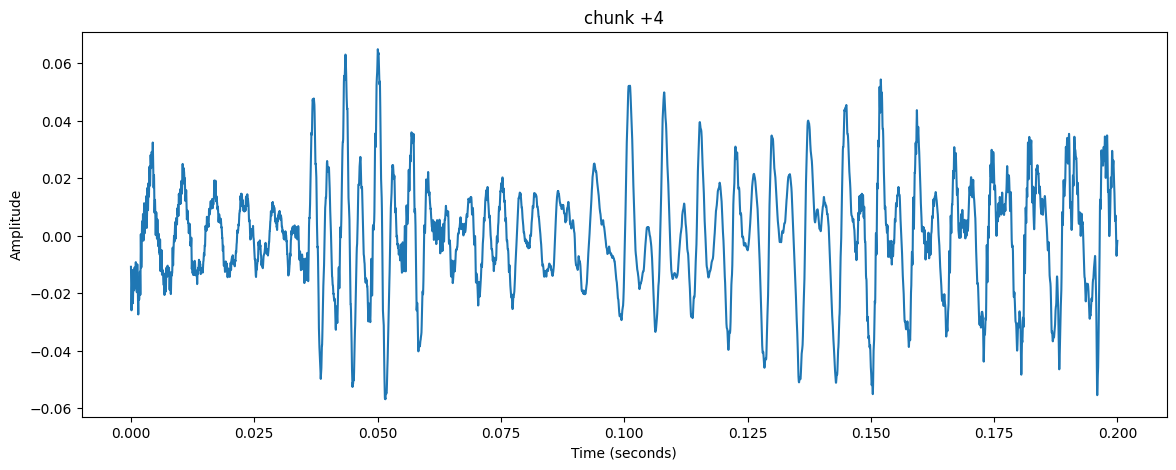

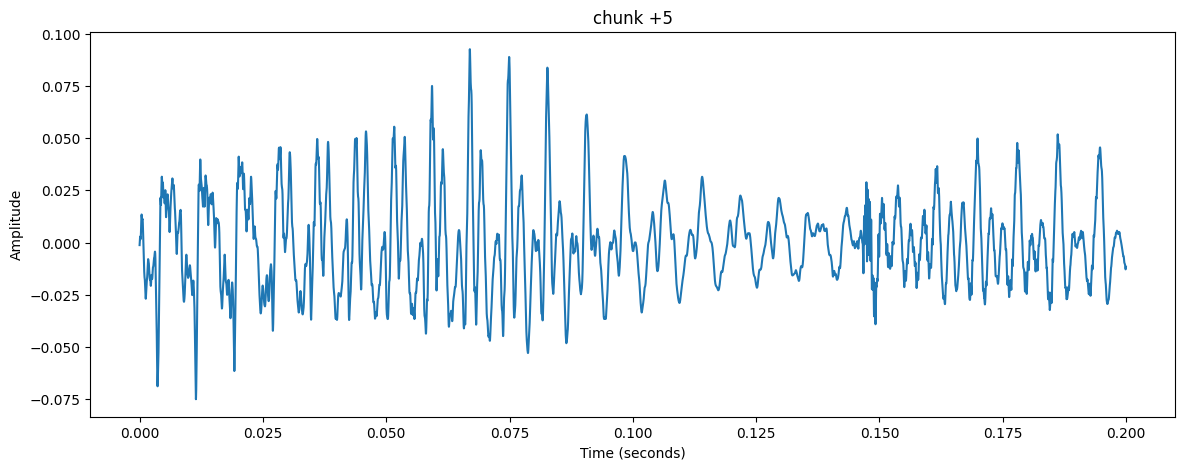

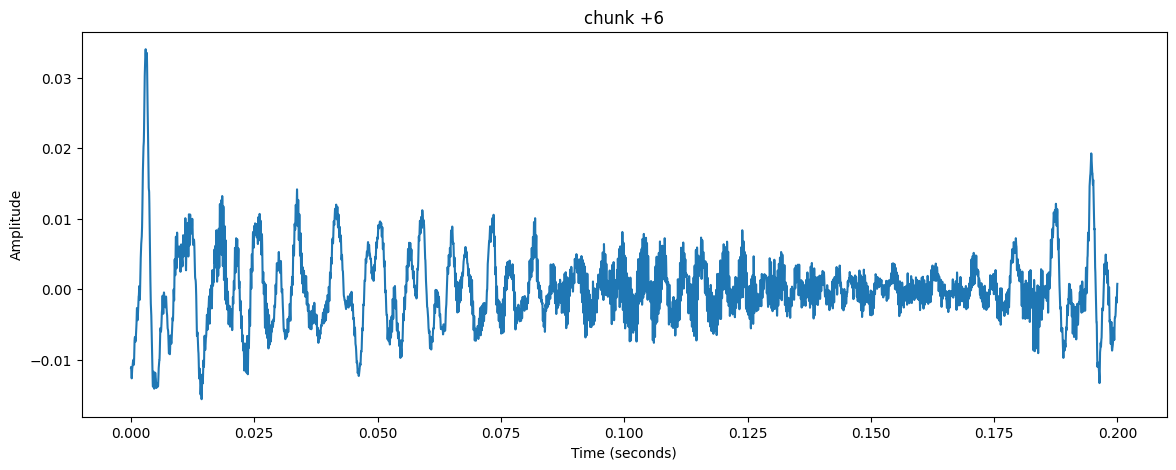

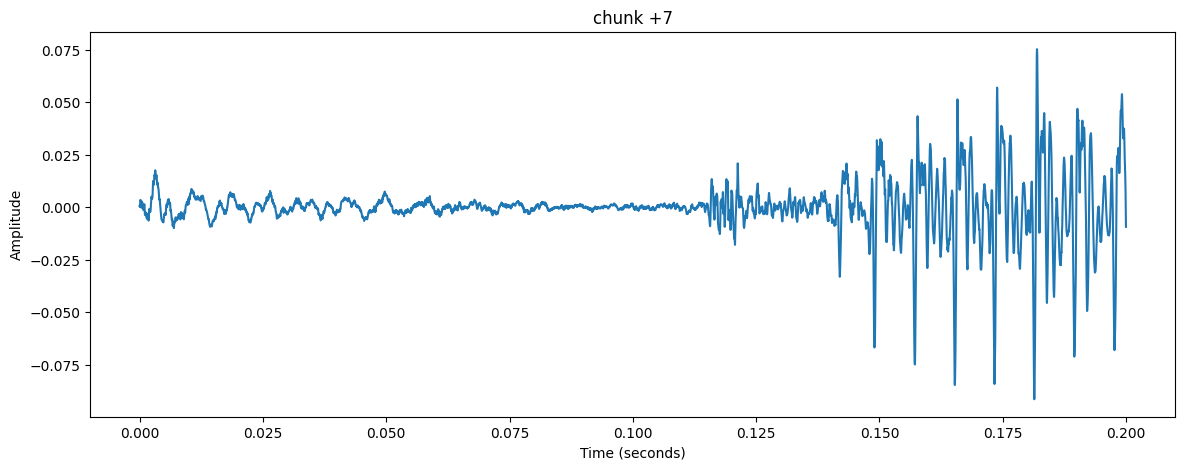

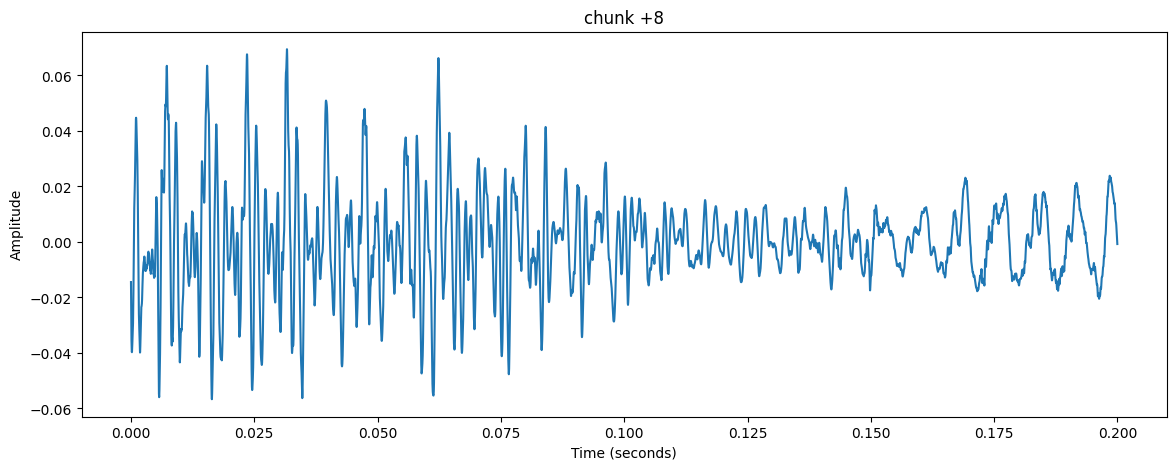

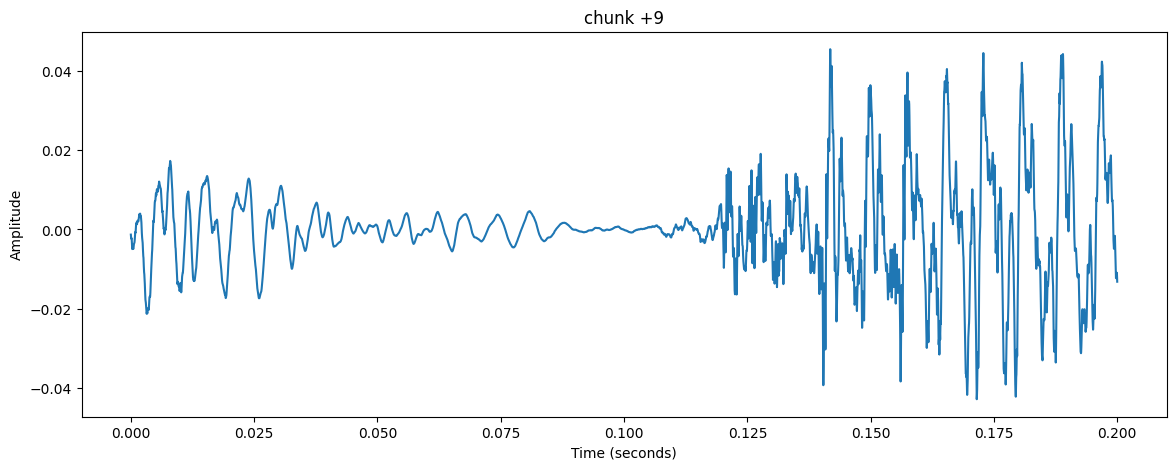

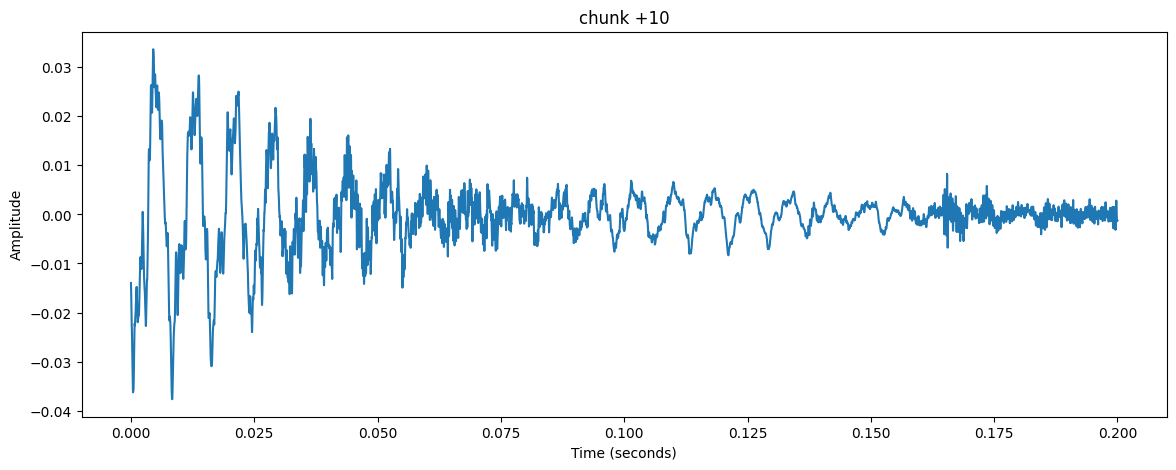

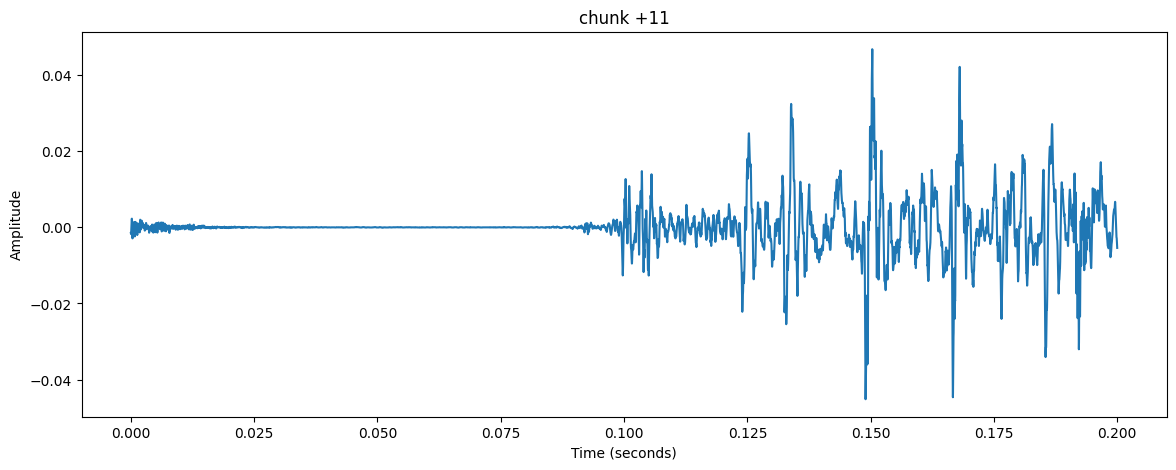

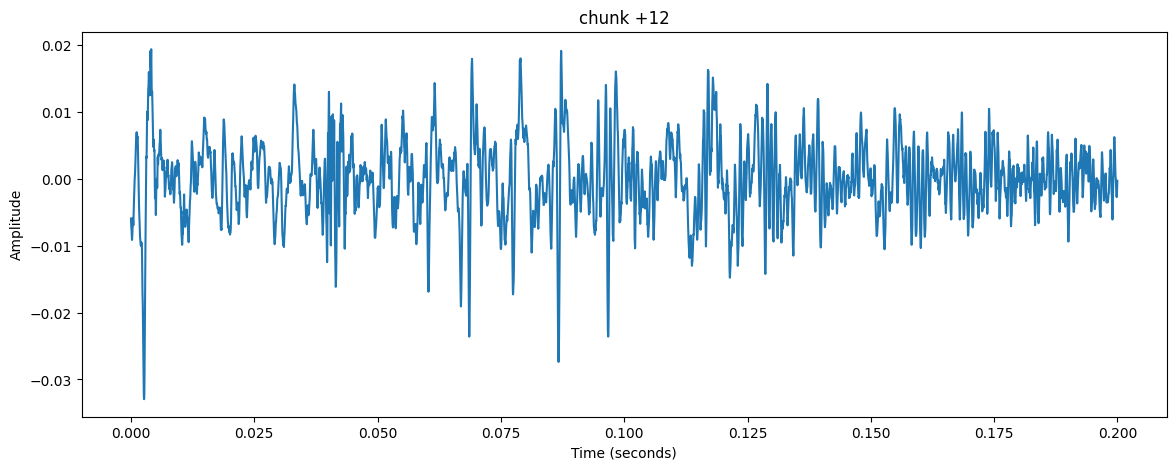

In [402]:
for i in range(num_chunks):
    time = np.arange(0, len(chunks[i])) / sr
    plotWave(chunks[i], time,f"chunk +{i+1}")

In [403]:

freq_chunks = []
freqs = []
for chunk in chunks:
    freq_chunk = np.fft.fft(chunk)
    freq = np.fft.fftfreq(len(chunks[i]), 1/sr)


    freq_chunks.append(np.abs(freq_chunk[:len(freq_chunk)//2]))
    freqs.append(freq[:len(freq)//2])


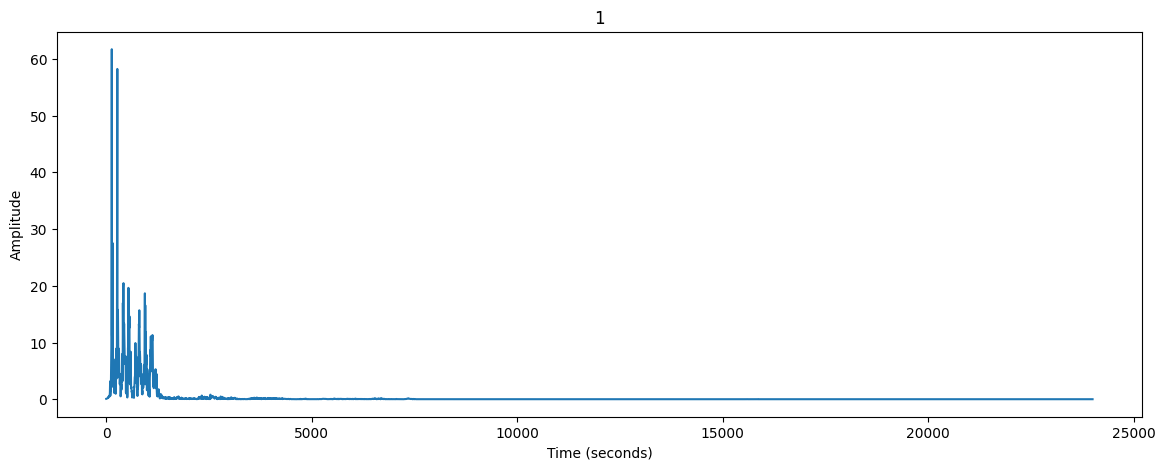

In [404]:
plotWave(freq_chunks[0], freqs[0], "1" )

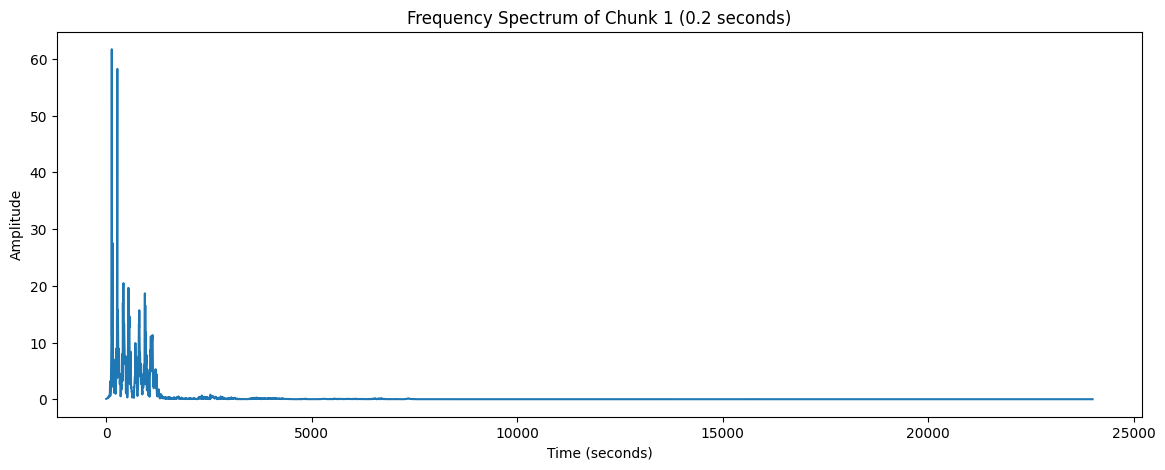

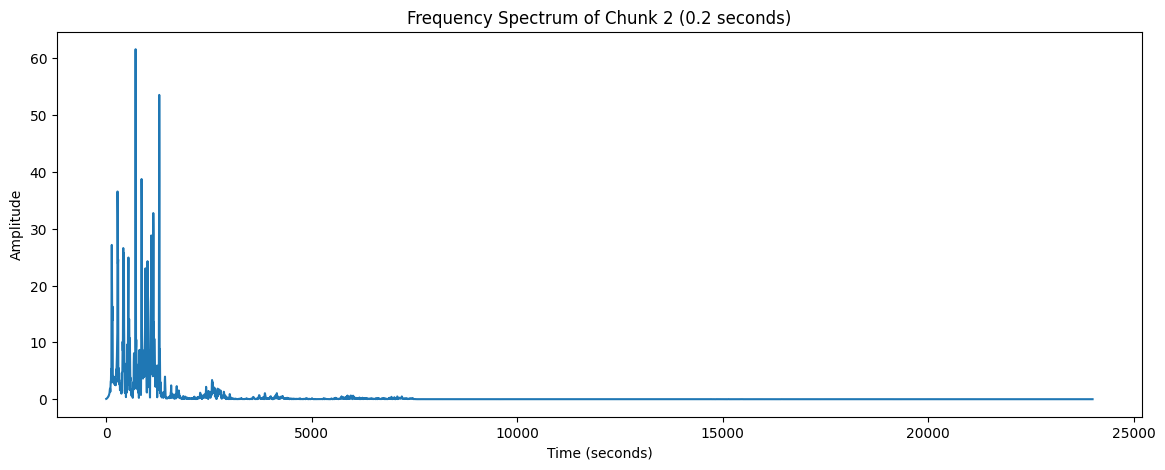

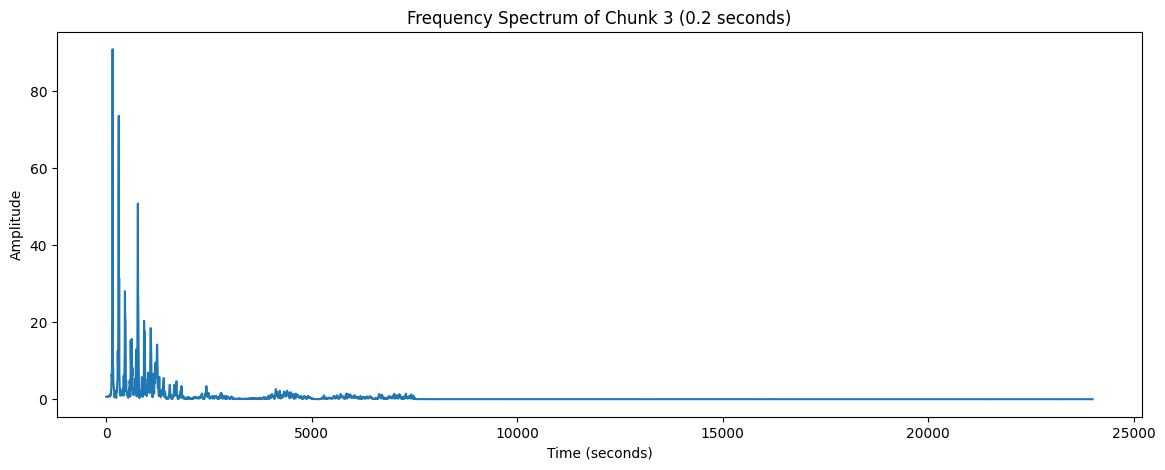

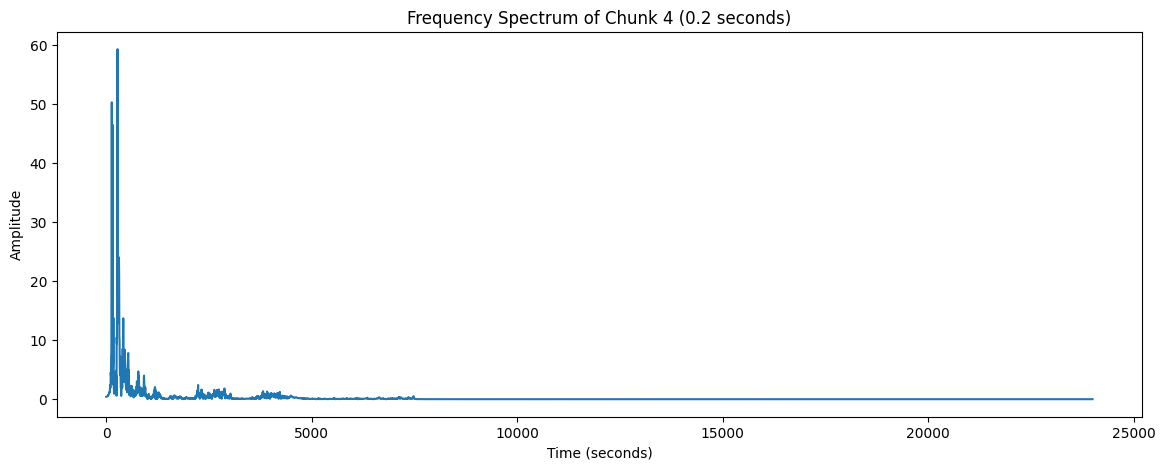

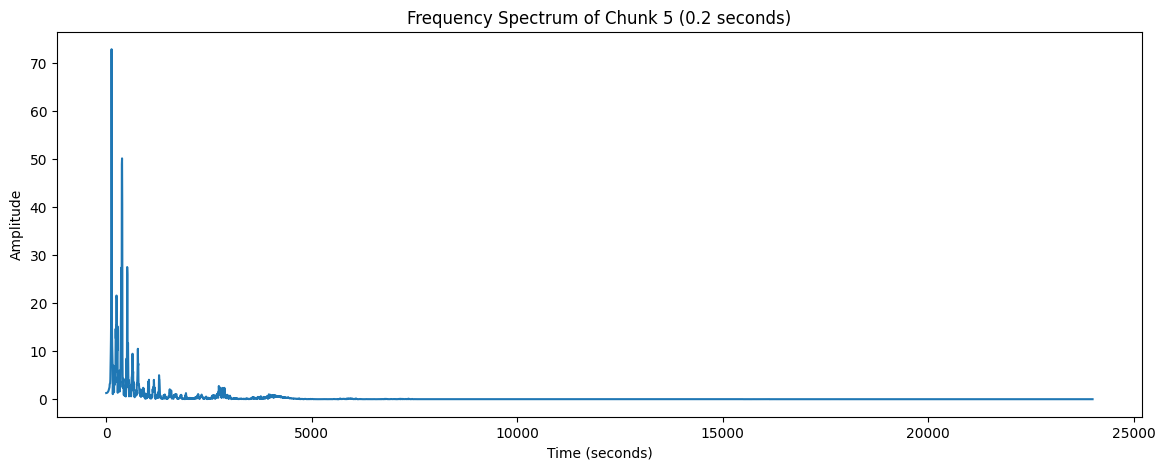

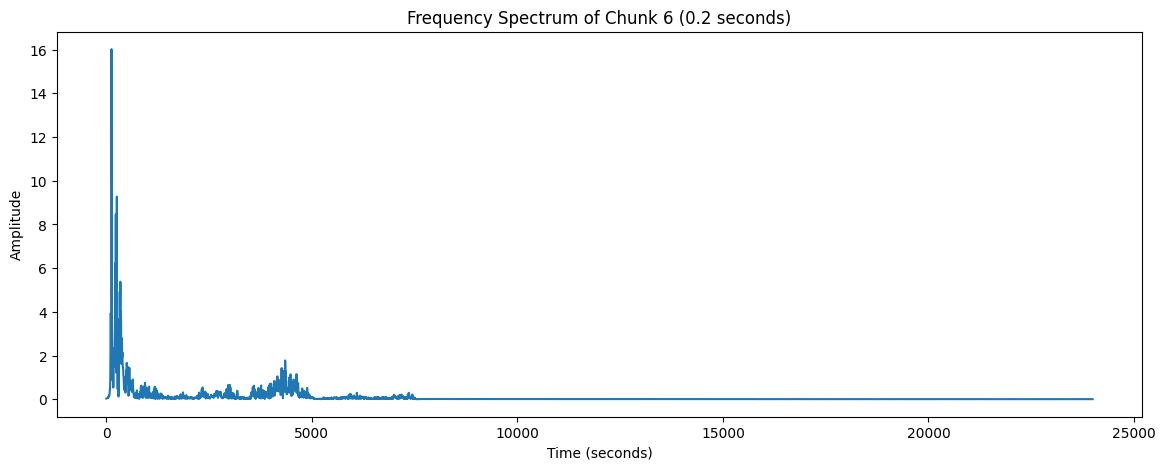

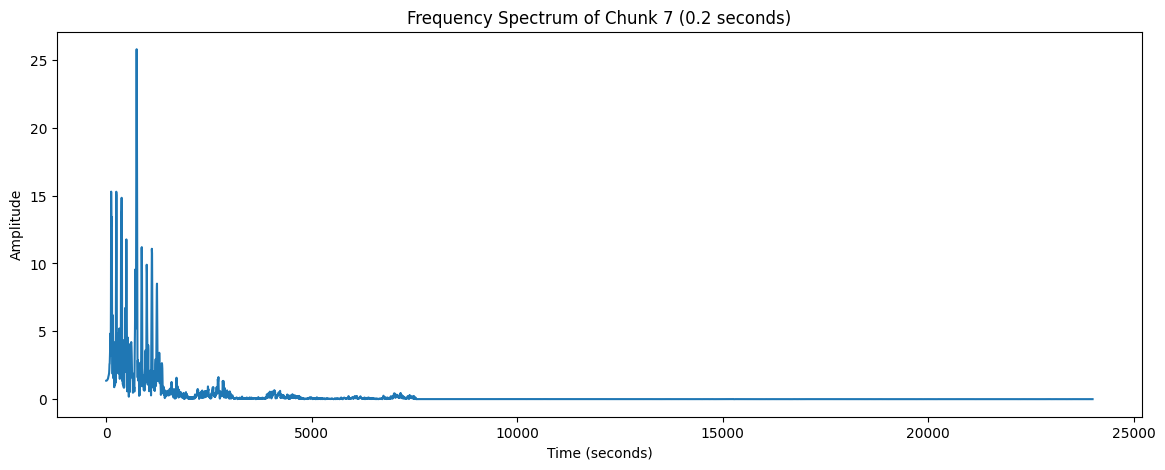

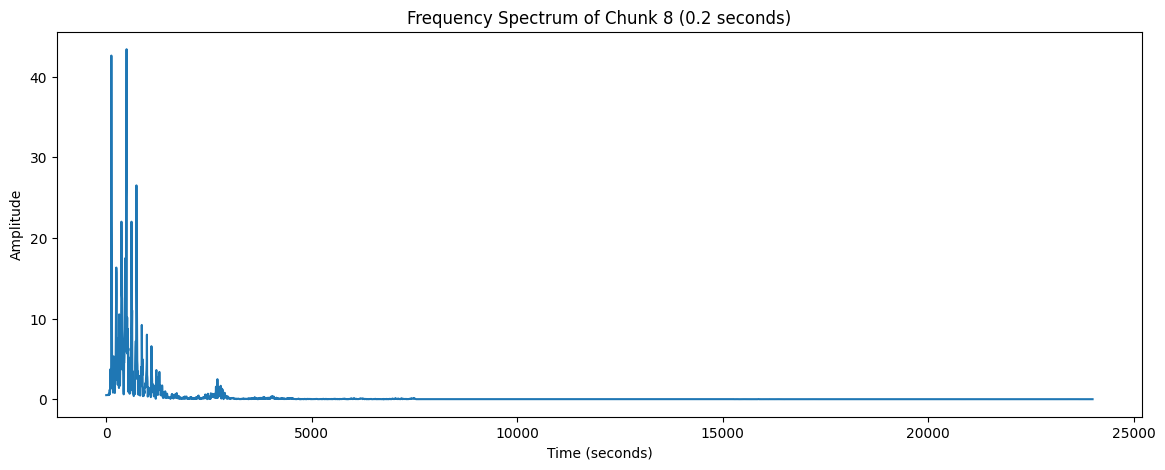

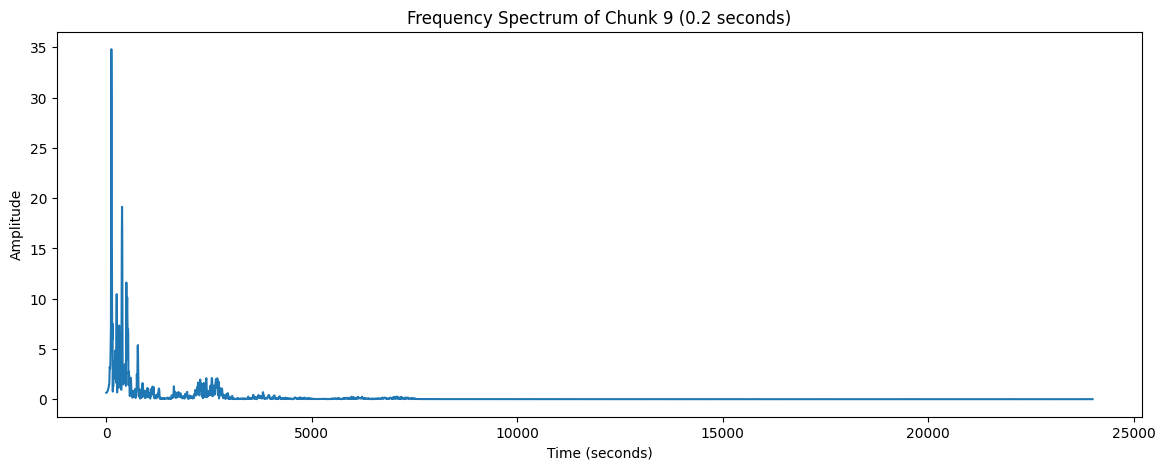

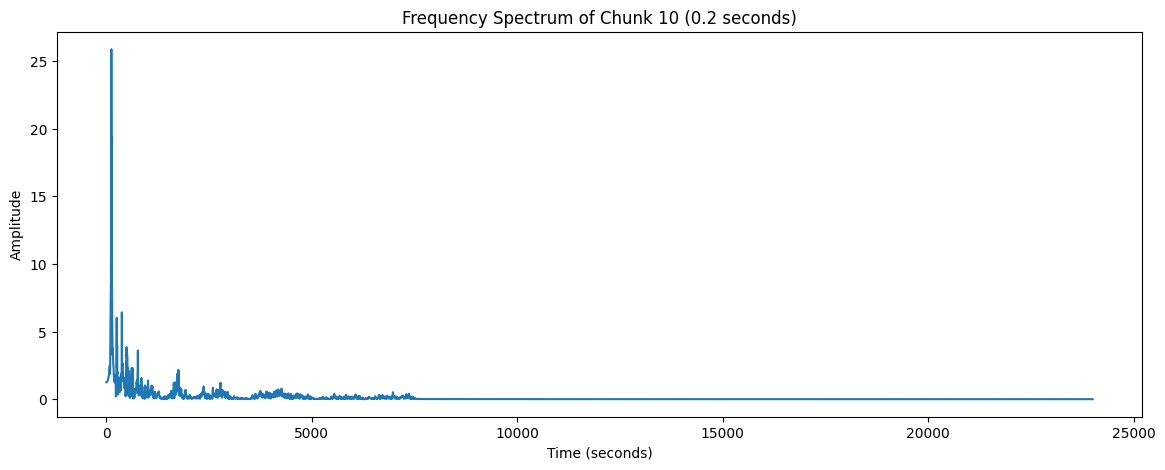

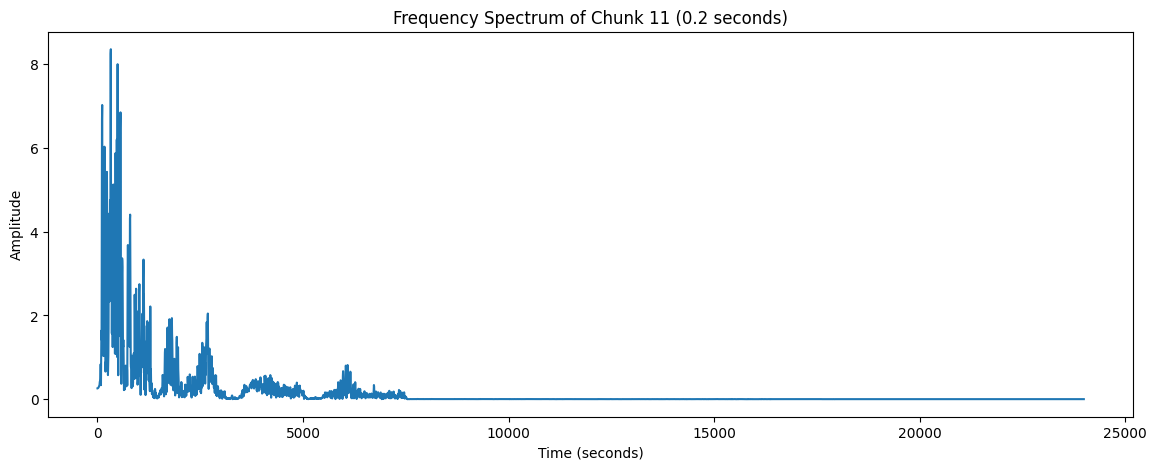

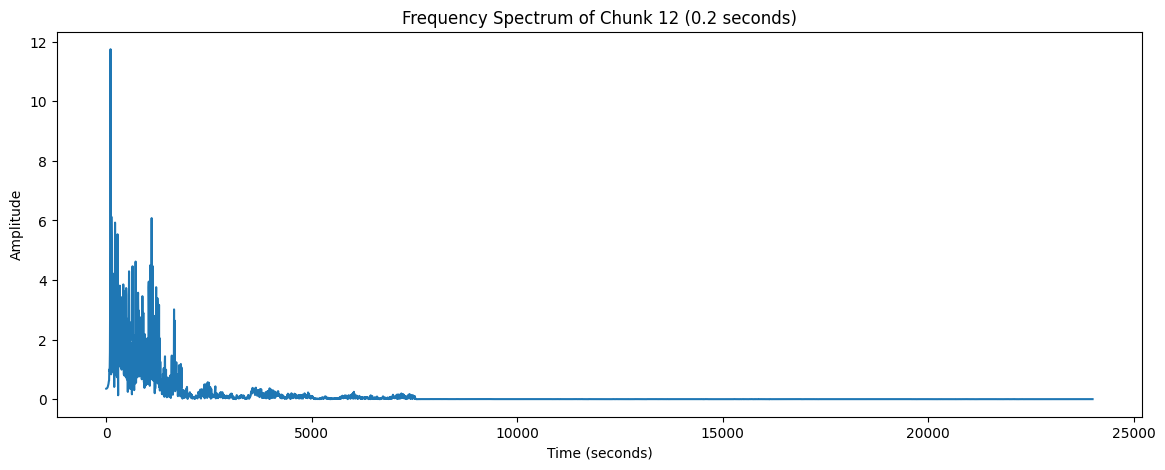

In [405]:
for i in range(num_chunks):
    plotWave(freq_chunks[i], freqs[i], f"Frequency Spectrum of Chunk {i+1} (0.2 seconds)" )

In [406]:
mag_chunks = np.abs(freq_chunks)

In [407]:
# Find peak frequencies and magnitudes in all chunks
peak_freqs_all = []
peak_mags_all = []
peak_powers_all = []

for i in range(len(mag_chunks)):
    peak_indices, _ = find_peaks(mag_chunks[i])
    peak_freqs = np.fft.fftfreq(chunk_size, 1/sr)[peak_indices]
    peak_mags = mag_chunks[i][peak_indices]
    peak_powers = peak_mags**2


    peak_freqs_all.append(peak_freqs)
    peak_mags_all.append(peak_mags)
    peak_powers_all.append(peak_powers)

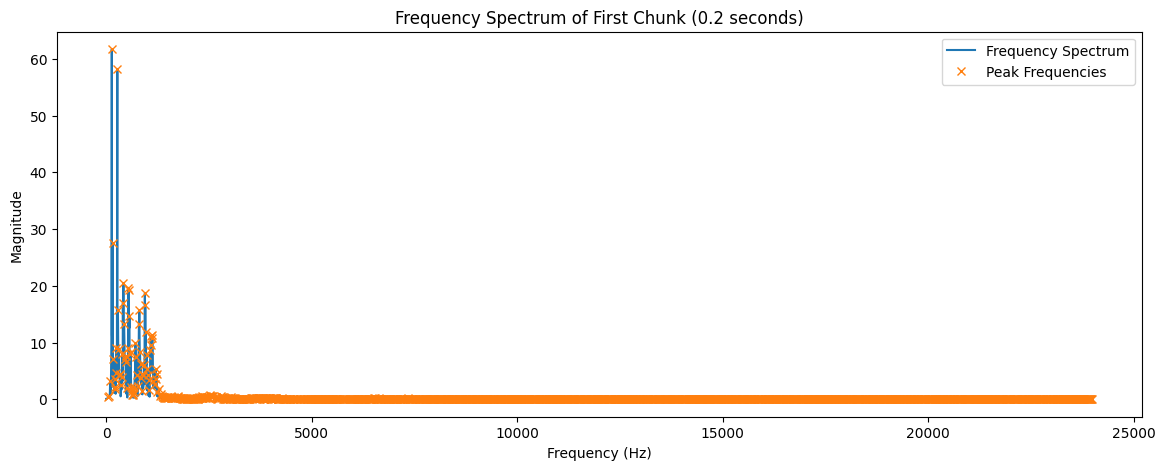

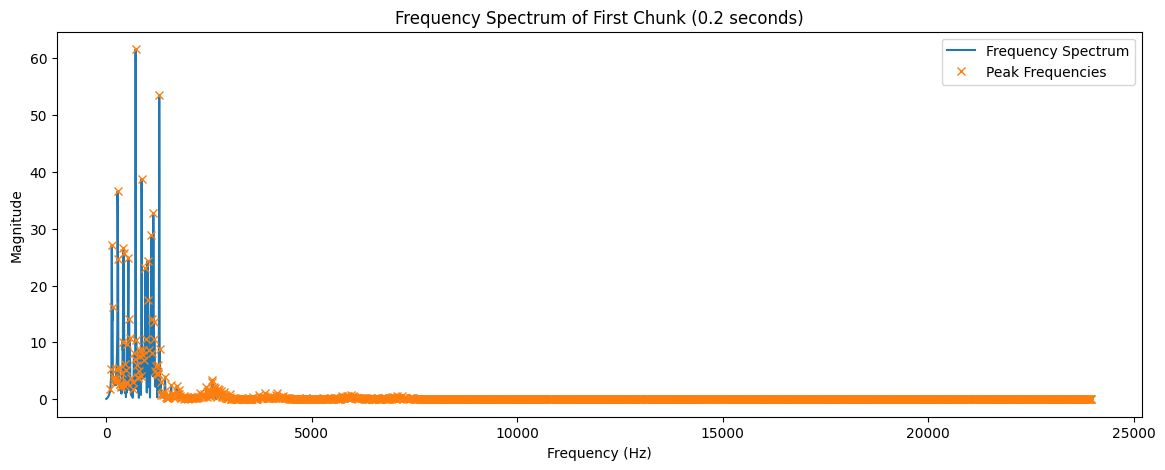

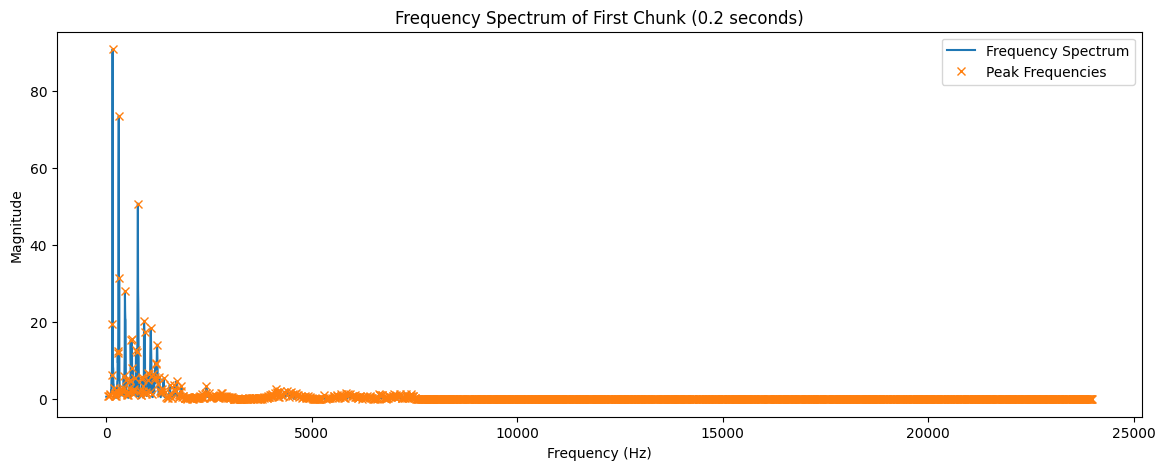

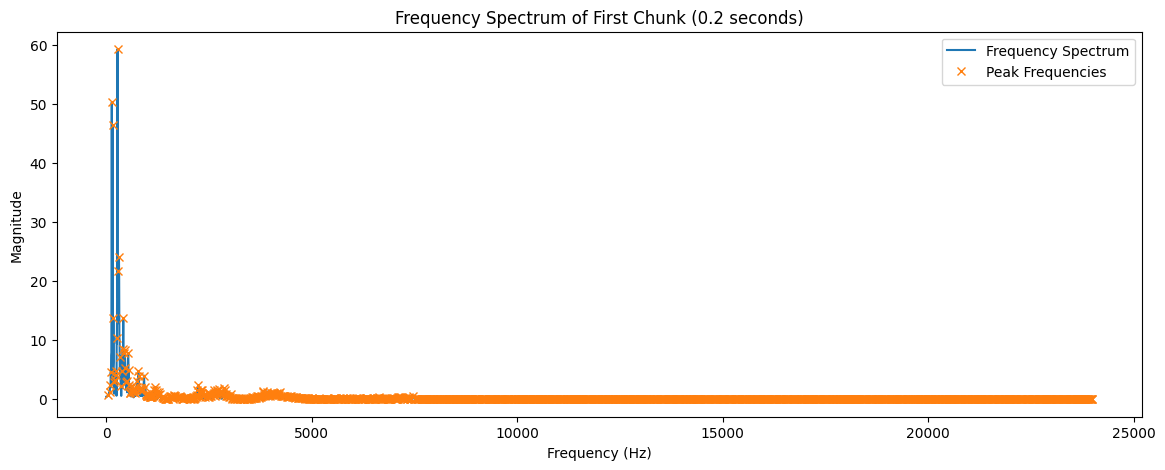

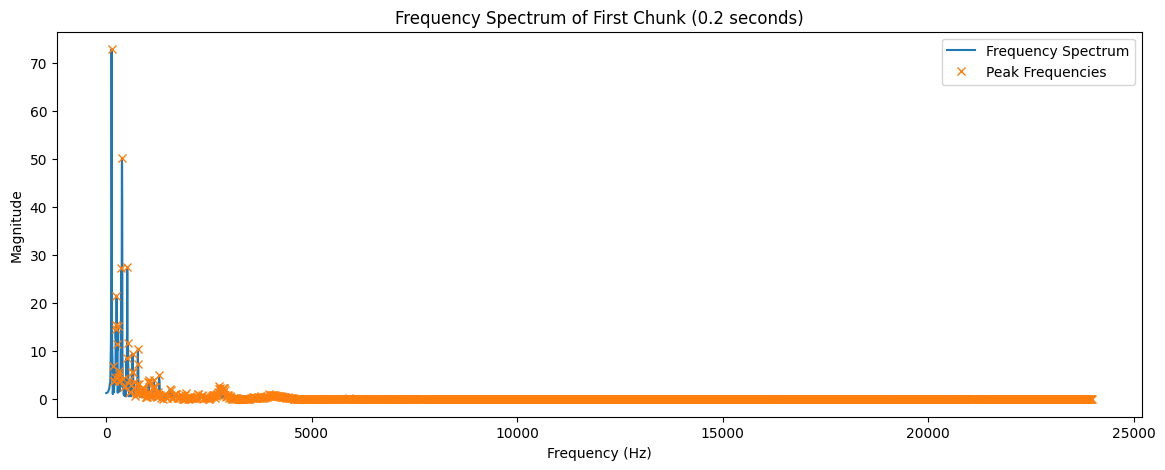

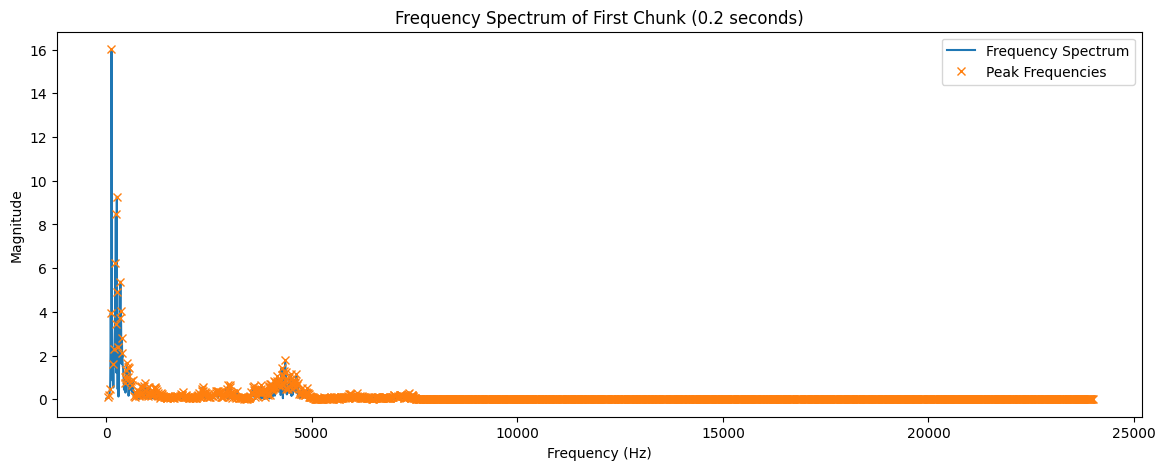

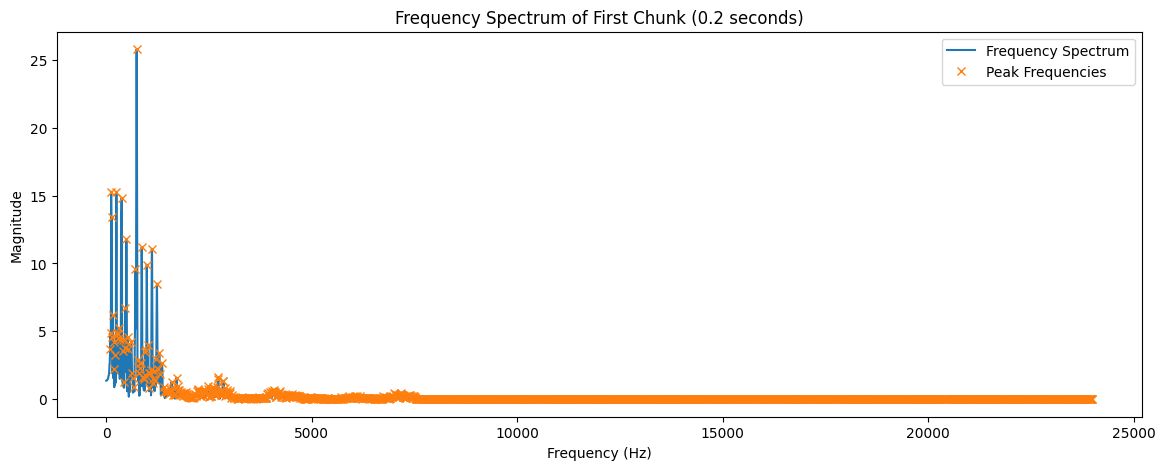

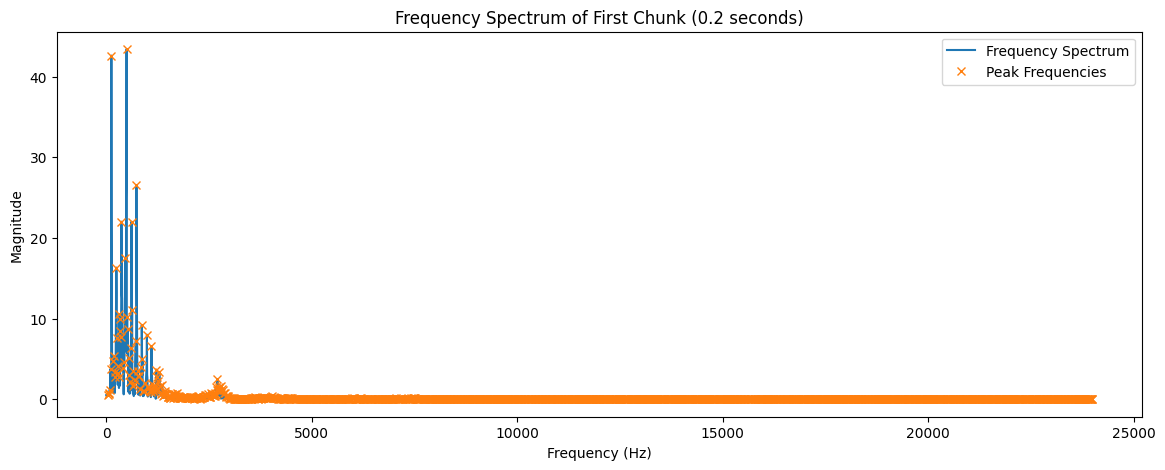

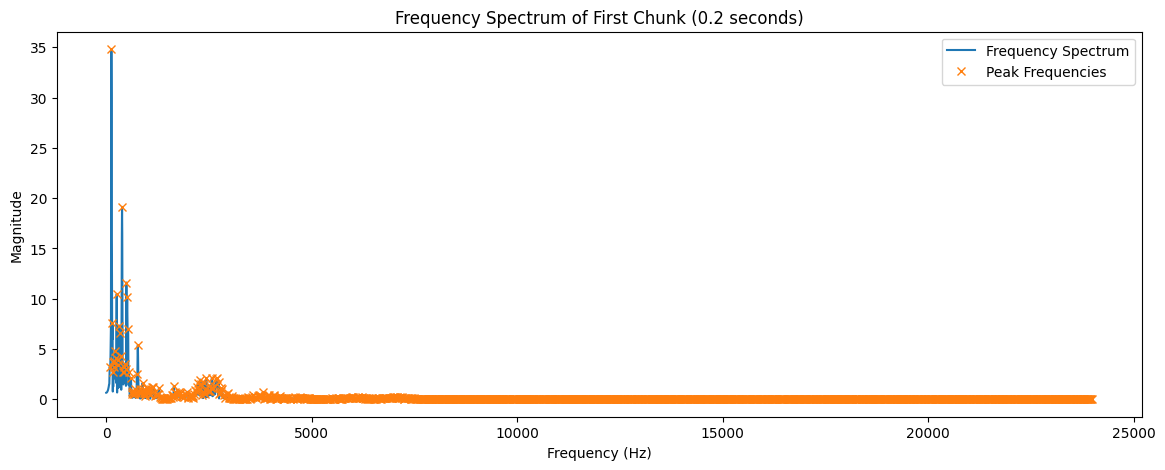

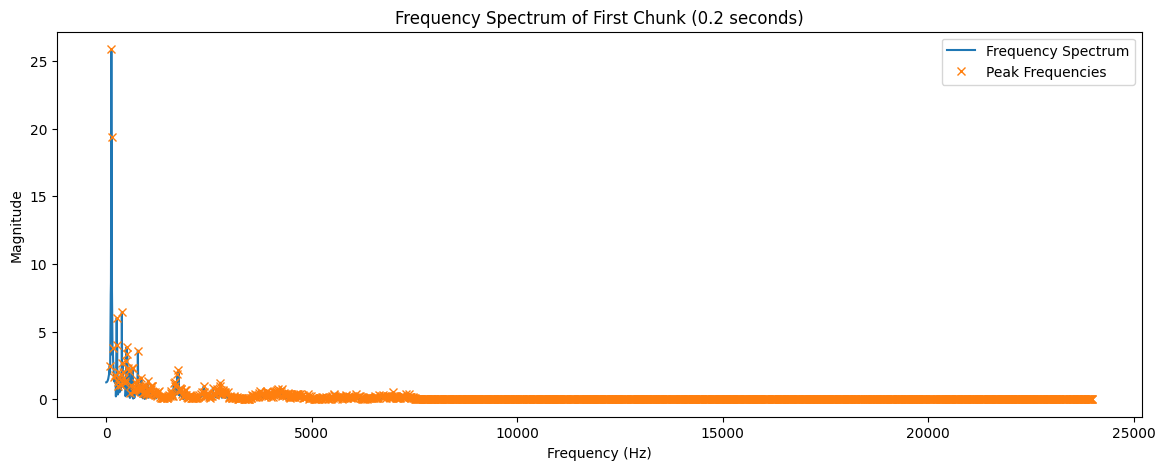

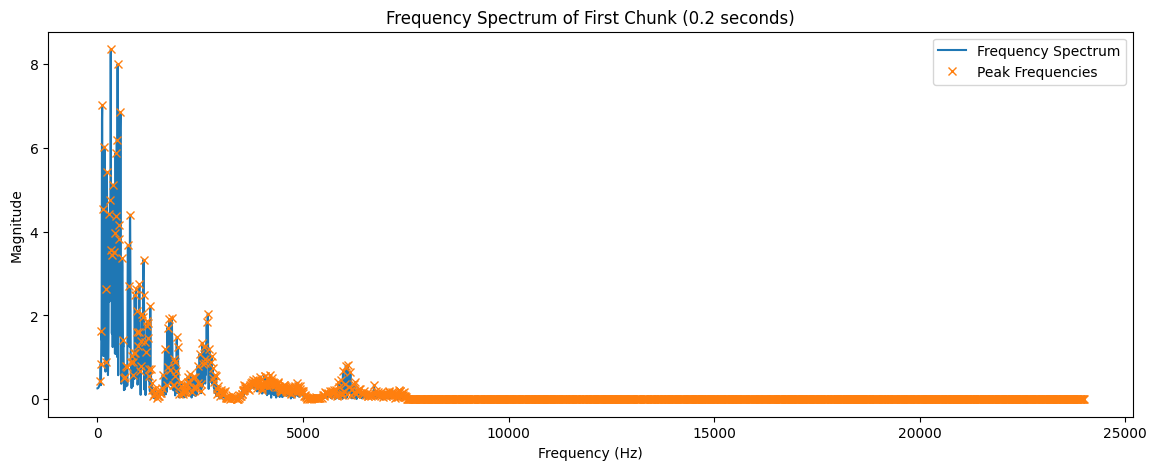

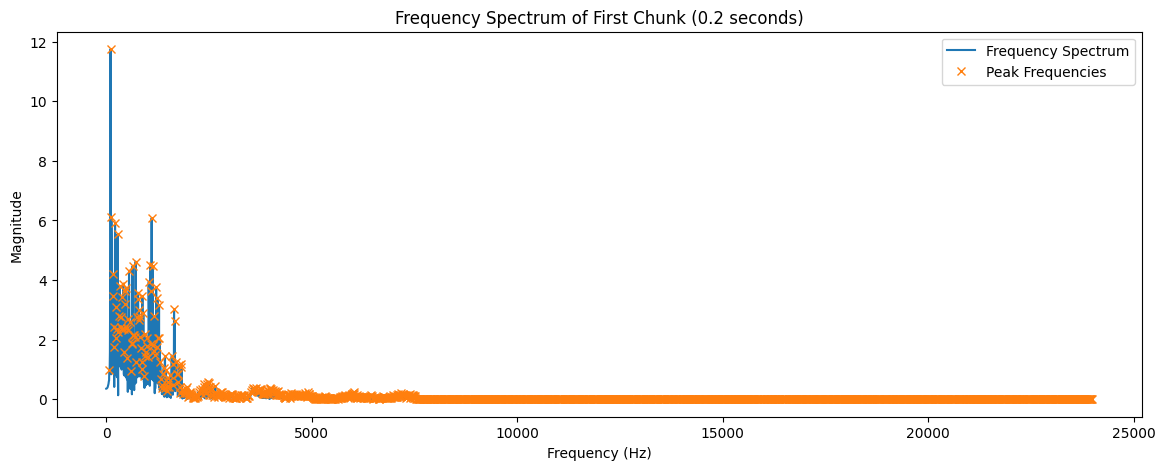

In [408]:
for i in range(len(mag_chunks)) :
    plt.figure(figsize=(14, 5))
    plt.plot(freqs[i], mag_chunks[i], label='Frequency Spectrum')
    plt.plot(peak_freqs_all[i], peak_mags_all[i], 'x', label='Peak Frequencies')
    plt.title('Frequency Spectrum of First Chunk (0.2 seconds)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.legend()
    plt.show()

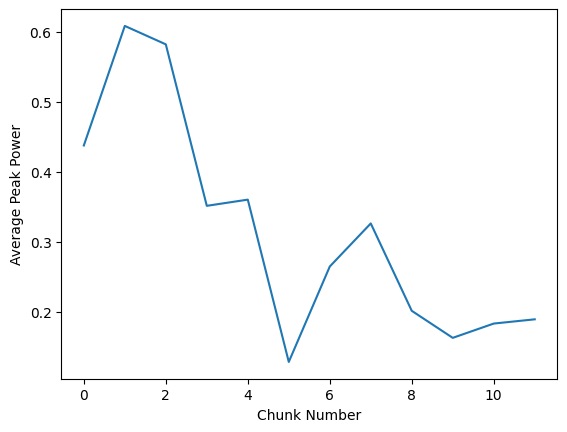

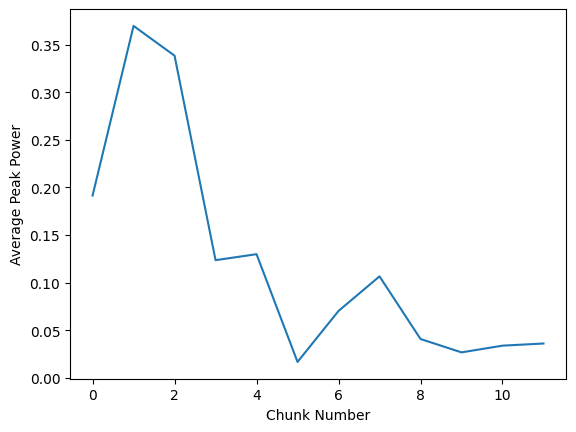

In [409]:
avg_peak_powers_all = []
avg_energies = []
for peak_powers in peak_mags_all:
    avg_peak_power = np.mean(peak_powers)
    avg_peak_powers_all.append(avg_peak_power)
    avg_energies.append(avg_peak_power**2)

plt.plot(avg_peak_powers_all)
plt.xlabel('Chunk Number')
plt.ylabel('Average Peak Power')
plt.show()
plt.plot(avg_energies)
plt.xlabel('Chunk Number')
plt.ylabel('Average Peak Power')
plt.show()

In [410]:
avg_peak_powers_all

[0.43762166311281886,
 0.6081649156724476,
 0.5818708156396274,
 0.3515657331545836,
 0.3604002512138938,
 0.12892454759963082,
 0.2649917813887233,
 0.32644353676819116,
 0.20182031521913765,
 0.16325191386766918,
 0.18364586030240962,
 0.18968214962765226]

In [411]:
avg_energies

[0.19151272002562952,
 0.36986456465487527,
 0.33857364609312524,
 0.12359846472851989,
 0.12988834107503774,
 0.016621538973769473,
 0.07022064420356892,
 0.10656538269772538,
 0.040731439635152085,
 0.02665118738145688,
 0.03372580200621215,
 0.03597931788736706]

average energy

In [412]:
threshold = -40.0
silence_ratio_all = []
for chunk in chunks :
    rms = librosa.feature.rms(y=chunk)
    rms_db = librosa.amplitude_to_db(rms)
    num_silence_frames = np.sum(rms_db < threshold)
    duration = librosa.get_duration(y=chunk, sr=sr)
    duration_silence = num_silence_frames * duration / rms.shape[1]
    silence_ratio = duration_silence / duration

    silence_ratio_all.append(silence_ratio)

    print("Silence ratio: {:.2f}".format(silence_ratio))

Silence ratio: 0.11
Silence ratio: 0.00
Silence ratio: 0.00
Silence ratio: 0.11
Silence ratio: 0.00
Silence ratio: 1.00
Silence ratio: 0.68
Silence ratio: 0.37
Silence ratio: 0.68
Silence ratio: 0.79
Silence ratio: 0.84
Silence ratio: 1.00


In [413]:
print('Chunk\tAvg Energy\tSilent Ratio')
for i, energy in enumerate(avg_energies):
    print(f'{i+1}\t{energy:.4f}\t\t{silence_ratio_all[i]:.4f}')

print(f'jumlah \t{np.sum(avg_energies):.4f}  \t{np.sum(silence_ratio_all):.4f}')
print(f'Average\t{np.mean(avg_energies):.4f}  \t{np.mean(silence_ratio_all):.4f}')

Chunk	Avg Energy	Silent Ratio
1	0.1915		0.1053
2	0.3699		0.0000
3	0.3386		0.0000
4	0.1236		0.1053
5	0.1299		0.0000
6	0.0166		1.0000
7	0.0702		0.6842
8	0.1066		0.3684
9	0.0407		0.6842
10	0.0267		0.7895
11	0.0337		0.8421
12	0.0360		1.0000
jumlah 	1.4839  	5.5789
Average	0.1237  	0.4649


In [414]:
chunk_energies = np.sum(mag_chunks**2, axis=1) / (chunk_size // 2)
threshold = 0.1
silent_ratios = []
for mag_chunk in mag_chunks:
    silent_energy = np.sum(mag_chunk[mag_chunk < threshold])**2
    total_energy = np.sum(mag_chunk)**2
    silent_ratio = silent_energy / total_energy
    silent_ratios.append(silent_ratio)

In [415]:
print('Chunk\tAvg Energy\tSilent Ratio')
for i, energy in enumerate(chunk_energies):
    print(f'{i+1}\t{energy:.4f}\t\t{silent_ratios[i]:.4f}')

print(f'jumlah \t{np.sum(chunk_energies):.4f} \t{np.sum(silent_ratios):.4f}')
print(f'Average\t{np.mean(chunk_energies):.4f}  \t{np.mean(silent_ratio):.4f}')

Chunk	Avg Energy	Silent Ratio
1	4.2040		0.0007
2	7.8673		0.0003
3	7.6080		0.0004
4	3.7324		0.0014
5	4.7903		0.0009
6	0.2447		0.0168
7	1.7500		0.0021
8	2.9329		0.0017
9	1.3057		0.0046
10	0.5119		0.0064
11	0.4195		0.0014
12	0.3105		0.0048
jumlah 	35.6772 	0.0415
Average	2.9731  	0.0048
